In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



# Data PreProcessing


### Data Visualization

In [3]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
features = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
X = dataset[features]
Y = dataset['stroke']

In [6]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


<AxesSubplot:xlabel='stroke', ylabel='count'>

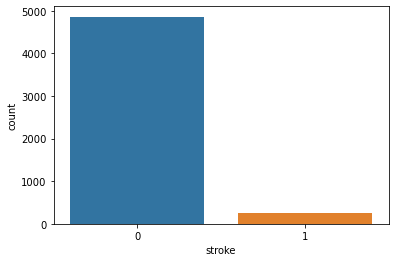

In [7]:
sns.countplot(x="stroke",data=dataset)

<AxesSubplot:xlabel='gender', ylabel='count'>

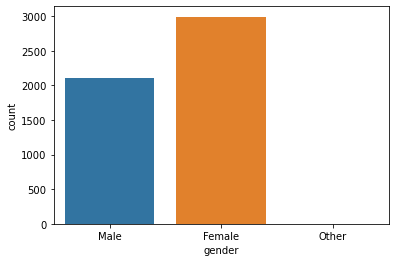

In [8]:
sns.countplot(x="gender",data=dataset)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

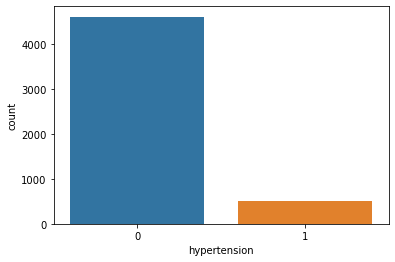

In [9]:
sns.countplot(x="hypertension",data=dataset)

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

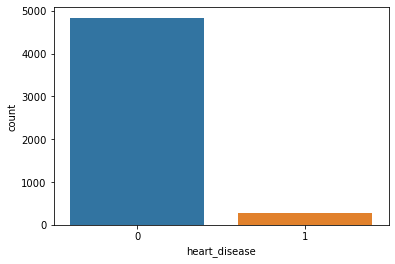

In [10]:
sns.countplot(x="heart_disease",data=dataset)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

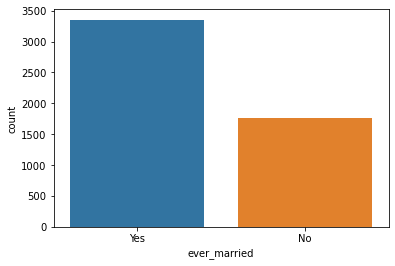

In [11]:
sns.countplot(x="ever_married",data=dataset)

<AxesSubplot:xlabel='work_type', ylabel='count'>

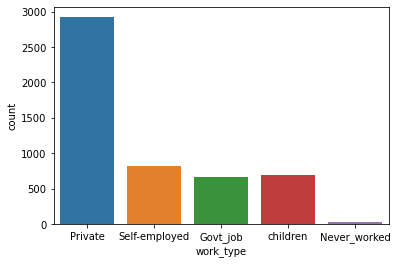

In [12]:
sns.countplot(x="work_type",data=dataset)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

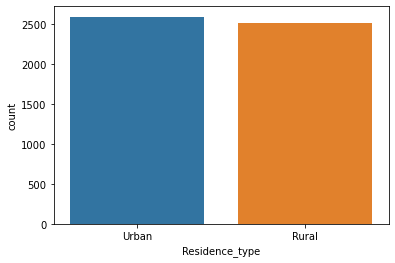

In [13]:
sns.countplot(x="Residence_type",data=dataset)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

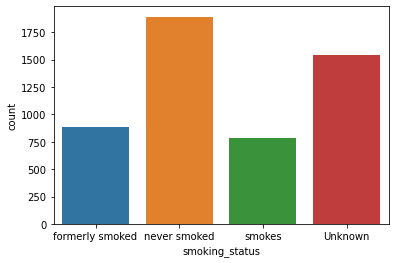

In [14]:
sns.countplot(x="smoking_status",data=dataset)

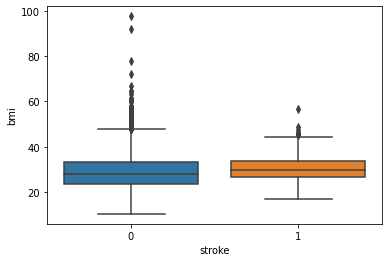

In [15]:
ax = sns.boxplot(x="stroke", y="bmi", data=dataset)

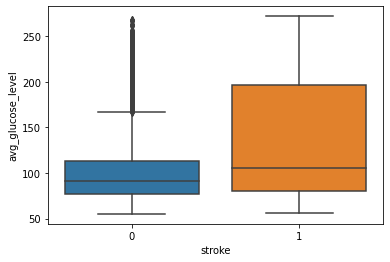

In [16]:
ax = sns.boxplot(x="stroke", y="avg_glucose_level", data=dataset)

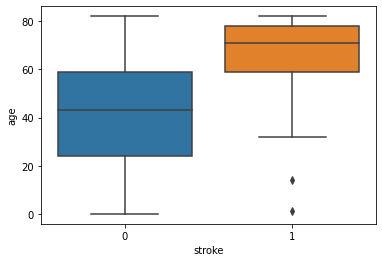

In [17]:
ax = sns.boxplot(x="stroke", y="age", data=dataset)

### Treating NaN, null Values

In [18]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
# Replacing Null Numeric vals

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
imputer.fit(X.iloc[:,8:9])
X.iloc[:,8:9] = imputer.transform(X.iloc[:,8:9])
print(X.isnull().sum())
dataset1 = pd.DataFrame(X)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [20]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [21]:
dataset1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035
std,22.612647,0.296607,0.226063,45.283560,7.699562
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,77.245000,23.800000
50%,45.000000,0.000000,0.000000,91.885000,28.100000
75%,61.000000,0.000000,0.000000,114.090000,32.800000
max,82.000000,1.000000,1.000000,271.740000,97.600000


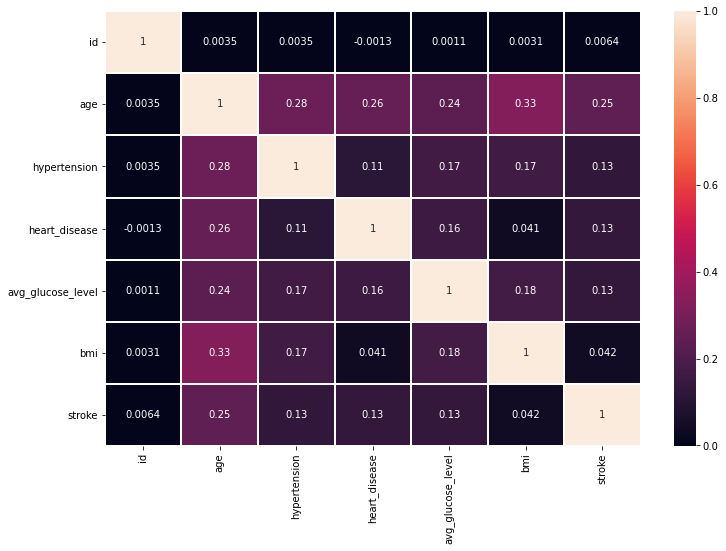

In [22]:
# dropping the rows having NaN values 
# df = pd.DataFrame(X)   
# df = df.dropna()   
# print(df)
plt.figure(figsize = (12, 8))
sns.heatmap(dataset.corr(), linecolor = 'white', linewidths = 1, annot = True)
plt.show()

In [23]:
X['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [24]:
# from sklearn.utils import resample

# train_data = pd.concat([X, Y], axis=1)
# # separate minority and majority classes
# negative = train_data[train_data.stroke==0]
# positive = train_data[train_data.stroke==1]
# # upsample minority
# pos_upsampled = resample(positive,
#  replace=True, # sample with replacement
#  n_samples=len(negative), # match number in majority class
#  random_state=27) # reproducible results
# # combine majority and upsampled minority
# upsampled = pd.concat([negative, pos_upsampled])
# # check new class counts
# upsampled.stroke.value_counts()

In [25]:
# X = upsampled.iloc[:, 0:10]
# Y = upsampled.iloc[:,10:11]
# del X_train['stroke']
X["age"]

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64

### Treating Categorical Variables


In [26]:
X.dtypes
Categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
for col in Categorical_cols:
    print('Column Name: ' +col)
    print(X[col].value_counts())

Column Name: gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Column Name: ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
Column Name: work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Column Name: Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
Column Name: smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [27]:
# Treating Independent Varibles


# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
# df = np.array(ct.fit_transform(df))

                    #OR

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = pd.DataFrame(OH_encoder.fit_transform(X[Categorical_cols]))

# One-hot encoding removed index; put it back
X_encoded.index = X.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = X.drop(Categorical_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, X_encoded], axis=1)

In [28]:
print(OH_X)

       age  hypertension  heart_disease  avg_glucose_level   bmi    0    1  \
0     67.0             0              1             228.69  36.6  0.0  1.0   
1     61.0             0              0             202.21  28.1  1.0  0.0   
2     80.0             0              1             105.92  32.5  0.0  1.0   
3     49.0             0              0             171.23  34.4  1.0  0.0   
4     79.0             1              0             174.12  24.0  1.0  0.0   
...    ...           ...            ...                ...   ...  ...  ...   
5105  80.0             1              0              83.75  28.1  1.0  0.0   
5106  81.0             0              0             125.20  40.0  1.0  0.0   
5107  35.0             0              0              82.99  30.6  1.0  0.0   
5108  51.0             0              0             166.29  25.6  0.0  1.0   
5109  44.0             0              0              85.28  26.2  1.0  0.0   

        2    3    4  ...    6    7    8    9   10   11   12   1

In [29]:
OH_X.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,0,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,...,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.585910,0.413894,0.000196,0.343836,0.656164,...,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.492612,0.492578,0.013989,0.475034,0.475034,...,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
from imblearn.over_sampling import ADASYN
from collections import Counter
counter = Counter(Y)
print('before :',counter)
ADA = ADASYN(random_state=130,sampling_strategy='minority')
OH_X,Y = ADA.fit_resample(OH_X,Y)
counter = Counter(Y)
print("after :",counter)

before : Counter({0: 4861, 1: 249})
after : Counter({0: 4861, 1: 4798})


### Splitting Dataset


In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(OH_X, Y, test_size = 0.2, random_state = 0,stratify=Y)

### Feature Scaling


In [32]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

In [33]:
X_train.iloc[:],Y_train

(            age  hypertension  heart_disease  avg_glucose_level        bmi  \
 7315  38.644615             0              0          81.949635  24.547923   
 7710  60.551794             0              0         115.055800  25.134543   
 8839  77.910966             0              0         109.479200  30.719870   
 707   47.000000             0              0          75.300000  25.000000   
 5253  70.580775             0              0          96.250045  24.960392   
 ...         ...           ...            ...                ...        ...   
 8081  76.186529             0              0          57.751191  27.857513   
 8650  59.098160             0              0         117.745827  35.593252   
 6567  47.915467             0              0         160.268985  35.366857   
 5548  72.352909             0              0         100.921811  26.478448   
 8241  80.083709             0              0          92.025634  30.392080   
 
              0         1    2         3         4

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train,X_test)

[[-0.72254021 -0.30407943 -0.22521256 ...  1.8377405  -0.62579966
  -0.46848634]
 [ 0.27054175 -0.30407943 -0.22521256 ...  0.22465804 -0.80599211
   1.57952164]
 [ 1.05745643 -0.30407943 -0.22521256 ... -0.59731496  1.36391895
  -0.46848634]
 ...
 [-0.30228001 -0.30407943 -0.22521256 ... -0.59731496  0.76434436
  -0.46848634]
 [ 0.8055022  -0.30407943 -0.22521256 ...  0.85676982 -0.80599211
  -0.46848634]
 [ 1.15594979 -0.30407943 -0.22521256 ...  0.2116049   0.74725963
  -0.46848634]] [[ 0.65351031 -0.30407943 -0.22521256 ... -0.59731496  1.43028689
  -0.46848634]
 [-0.52510475 -0.30407943 -0.22521256 ...  2.05114524 -0.80599211
  -0.46848634]
 [-0.52510475 -0.30407943 -0.22521256 ... -0.59731496  1.43028689
  -0.46848634]
 ...
 [ 0.24552817 -0.30407943 -0.22521256 ... -0.59731496 -0.32387042
   1.8609509 ]
 [-0.93308688 -0.30407943 -0.22521256 ... -0.59731496  1.43028689
  -0.46848634]
 [ 0.55070796 -0.30407943 -0.22521256 ...  1.37960263 -0.23896202
  -0.46848634]]


In [35]:
Y_train

7315    1
7710    1
8839    1
707     0
5253    1
       ..
8081    1
8650    1
6567    1
5548    1
8241    1
Name: stroke, Length: 7727, dtype: int64

# Models


## Classifiers

[[803 169]
 [134 826]] Nodes:  10 0.843167701863354
[[803 169]
 [134 826]] Nodes:  10 0.843167701863354
[[930  42]
 [132 828]] Nodes:  25 0.9099378881987578
[[930  42]
 [132 828]] Nodes:  25 0.9099378881987578
[[954  18]
 [107 853]] Nodes:  50 0.9353002070393375
[[954  18]
 [107 853]] Nodes:  50 0.9353002070393375
[[940  32]
 [ 68 892]] Nodes:  100 0.94824016563147
[[940  32]
 [ 68 892]] Nodes:  100 0.94824016563147
[[921  51]
 [ 45 915]] Nodes:  300 0.9503105590062112
[[921  51]
 [ 45 915]] Nodes:  300 0.9503105590062112


<AxesSubplot:>

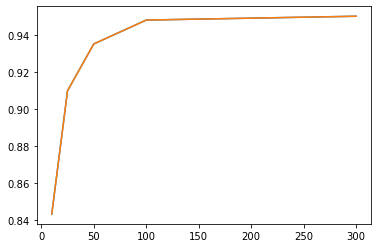

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix
nodes = [10,25,50,100,300]
accuracy =[]
accuracy1 =[]
for node in nodes:    
    criterion = ['entropy','gini']
    for criteria in criterion:    
        model = DecisionTreeClassifier(random_state=1,max_leaf_nodes=node)
        model.fit(X_train,Y_train)
        preds = model.predict(X_test)
        accs = accuracy_score(Y_test,preds)
        if criteria == 'entropy':
            accuracy.append(accs)
        else:
            accuracy1.append(accs)
        print(confusion_matrix(Y_test,preds),'Nodes: ', node,accs)
# print(accuracy)
sns.lineplot(x=nodes,y=accuracy)
sns.lineplot(x=nodes,y=accuracy1)

[[963   9]
 [ 41 919]] No of Estimators:  10 0.974120082815735
[[966   6]
 [ 43 917]] No of Estimators:  10 0.9746376811594203
[[962  10]
 [ 40 920]] No of Estimators:  15 0.974120082815735
[[965   7]
 [ 41 919]] No of Estimators:  15 0.9751552795031055
[[963   9]
 [ 42 918]] No of Estimators:  20 0.9736024844720497
[[965   7]
 [ 42 918]] No of Estimators:  20 0.9746376811594203
[[963   9]
 [ 40 920]] No of Estimators:  25 0.9746376811594203
[[963   9]
 [ 42 918]] No of Estimators:  25 0.9736024844720497
[[965   7]
 [ 43 917]] No of Estimators:  50 0.974120082815735
[[967   5]
 [ 42 918]] No of Estimators:  50 0.9756728778467909
[[965   7]
 [ 43 917]] No of Estimators:  100 0.974120082815735
[[965   7]
 [ 42 918]] No of Estimators:  100 0.9746376811594203
[[966   6]
 [ 41 919]] No of Estimators:  200 0.9756728778467909
[[966   6]
 [ 42 918]] No of Estimators:  200 0.9751552795031055


<AxesSubplot:>

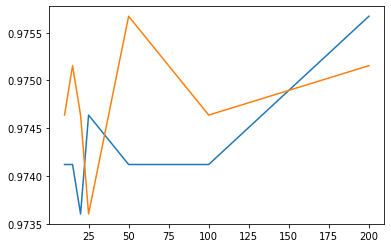

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error
nodes = [10,15,20,25,50,100,200]
accuracy =[]
accuracy1 =[]
for node in nodes:    
    criterion = ['entropy','gini']
    for criteria in criterion:
        random_model = RandomForestClassifier(criterion = criteria, random_state=0, n_estimators=node)
        random_model.fit(X_train,Y_train)
        preds = random_model.predict(X_test)
        accs = accuracy_score(Y_test,preds)
        if criteria == 'entropy':
            accuracy.append(accs)
        else:
            accuracy1.append(accs)
        print(confusion_matrix(Y_test,preds),'No of Estimators: ', node,accs)

sns.lineplot(x=nodes,y=accuracy)
sns.lineplot(x=nodes,y=accuracy1)

In [44]:
from xgboost import XGBClassifier   #XGBoostClassifier
classifier = XGBClassifier(random_state=2)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[957  15]
 [ 40 920]]


0.9715320910973085

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=random_model, X=X_train,y=Y_train,cv=1000)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))